# 2 散点图Scatterplot
散点图能够显示2个维度上2组数据的值。每个点代表一个观察点。X（水平）和Y（垂直）轴上的位置表示变量的值。研究这两个变量之间的关系是非常有用的。在seaborn中通过regplot和lmplot制作散点图，regplot和lmplot核心功能相近，regplot相对简单点，如果要定制图像更深层次功能，需要使用lmplot。此外也用Pairplot制作多变量图。该章节主要内容有：
1. 基础散点图绘制 Basic scatterplot
2. 更改标记参数 Control marker features
3. 自定义线性回归拟合 Custom linear regression fit
4. 使用分类变量为散点图着色 Use categorical variable to color scatterplot
5. 坐标轴范围设置 Control axis limits of plot
6. 在散点图上添加文本注释 Add text annotation on scatterplot
7. 自定义相关图 Custom correlogram

In [1]:
#调用seaborn
import seaborn as sns
#调用seaborn自带数据集
df = sns.load_dataset('iris')
#显示数据集
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.基础散点图绘制 Basic scatterplot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


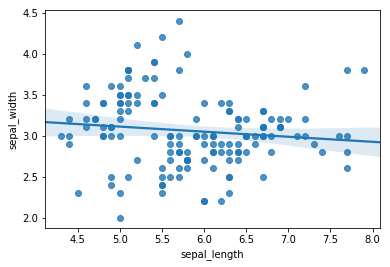

In [2]:
# 使用regplot（）函数制作散点图。您必须提供至少2个列表：X轴和Y轴上的点的位置。
# 默认情况下绘制线性回归拟合直线，可以使用fit_reg = False将其删除
# use the function regplot to make a scatterplot 有回归曲线
# scipy<1.2会有warning
sns.regplot(x=df["sepal_length"], y=df["sepal_width"]);

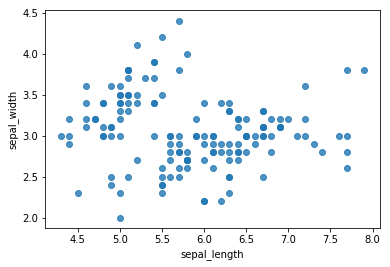

In [3]:
# Without regression fit 无回归曲线
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=False);

## 2. 更改标记参数 Control marker features

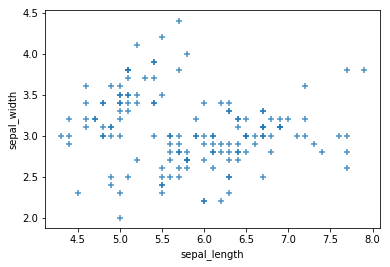

In [4]:
# 可以散点图自定义颜色，透明度，形状和大小
# Change shape of marker控制散点的形状
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], marker="+", fit_reg=False);

In [5]:
# List of available shapes 可用的形状查看
import matplotlib
all_shapes=matplotlib.markers.MarkerStyle.markers.keys()
all_shapes

dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', ''])

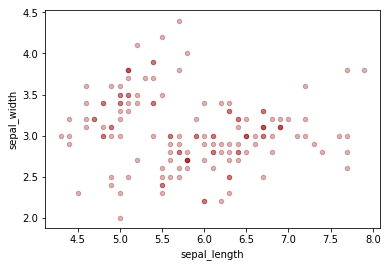

In [6]:
# More marker customization,更具scatter_kws参数控制颜色，透明度，点的大小
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":20});

## 3. 自定义线性回归拟合 Custom linear regression fit

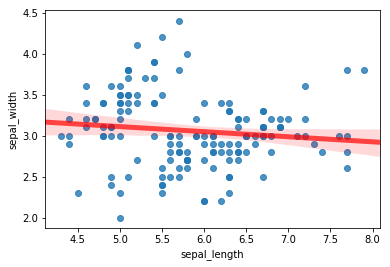

In [7]:
# 您可以自定义seaborn提出的回归拟合的外观。在此示例中，颜色，透明度和宽度通过line_kws = {}选项进行控制。
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], line_kws={"color":"r","alpha":0.7,"lw":5});

## 4. 使用分类变量为散点图着色 Use categorical variable to color scatterplot
+ 每组映射一种颜色 Map a color per group
+ 每组映射一个标记 Map a marker per group
+ 使用其他调色板 Use another palette
+ 控制每组的颜色 Control color of each group

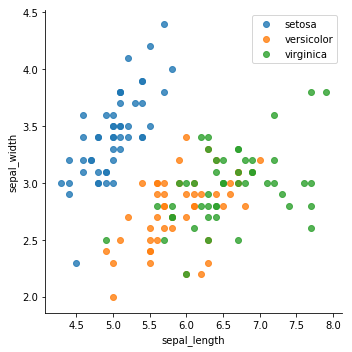

In [8]:
# 每组映射一种颜色 Map a color per group
# Use the 'hue' argument to provide a factor variable hue设置species不同种类的的颜色
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False);
# Move the legend to an empty part of the plot 需要通过matplotlib更改legend的位置
import matplotlib.pyplot as plt
plt.legend(loc='best');

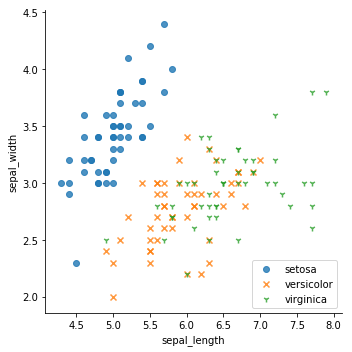

In [9]:
# 每组映射一个标记 Map a marker per group
# give a list to the marker argument 通过hue设定颜色，markes设定各点的形状
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False, markers=["o", "x", "1"])
# Move the legend to an empty part of the plot
plt.legend(loc='lower right');

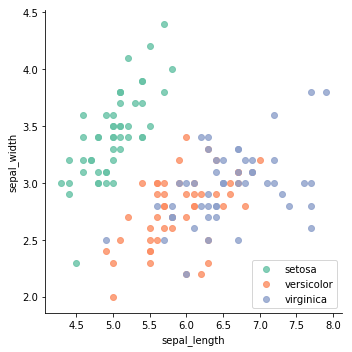

In [10]:
# 使用其他调色板 Use another palette
# Use the 'palette' argument 不同种类设定不同的颜色，颜色类型使用palette设定调色板颜色
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False, palette="Set2")
# Move the legend to an empty part of the plot
plt.legend(loc='lower right');

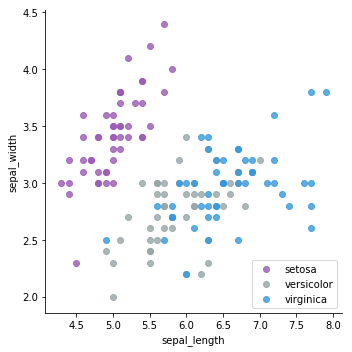

In [11]:
# 控制每组的颜色 Control color of each group
# Provide a dictionary to the palette argument 调色盘使用自定义颜色
dict_color=dict(setosa="#9b59b6", virginica="#3498db", versicolor="#95a5a6")
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False, palette=dict_color)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right');

## 5. 坐标轴范围设置 Control axis limits of plot

(0, 8.122715679666298)

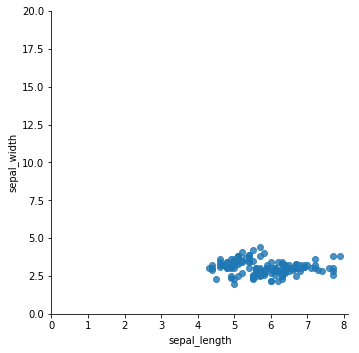

In [12]:
# basic scatterplot
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False)
# control x and y limits 设置轴的范围，不过需要调用matplotlib.pyplot 模块，通常都是matplotlib和seaborn一起用
plt.ylim(0, 20)
plt.xlim(0, None)

## 6. 在散点图上添加文本注释 Add text annotation on scatterplot
+ 添加一个注释 Add one annotation
+ 添加多个注释 Use a loop to annotate each marker

Text(3.2, 4.5, 'An annotation')

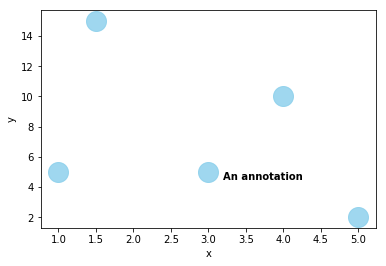

In [13]:
# 添加一个注释 Add one annotation
import pandas as pd 
# 制作数据集
df_test = pd.DataFrame({
    'x': [1, 1.5, 3, 4, 5],
    'y': [5, 15, 5, 10, 2],
    'group': ['A','other group','B','C','D']})
# 画散点图
p1=sns.regplot(data=df_test, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400});
# 添加注释
p1.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')

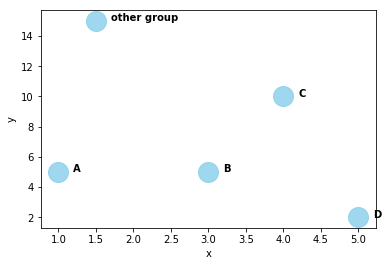

In [14]:
# 添加多个注释 Use a loop to annotate each marker
# basic plot
p1=sns.regplot(data=df_test, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
# add annotations one by one with a loop
for line in range(0,df_test.shape[0]):
     p1.text(df_test.x[line]+0.2, df_test.y[line], df_test.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

## 7. 自定义相关图 Custom correlogram
+ 有回归方程的散点相关图 correlogram with regression
+ 无回归方程的散点相关图 correlogram without regression 
+ 在相关图上表示组 Represent groups on correlogram
+ 相关图子图设置 Kind of plot for the diagonal subplots
+ 子图参数设置 parameters adjustment of subplots

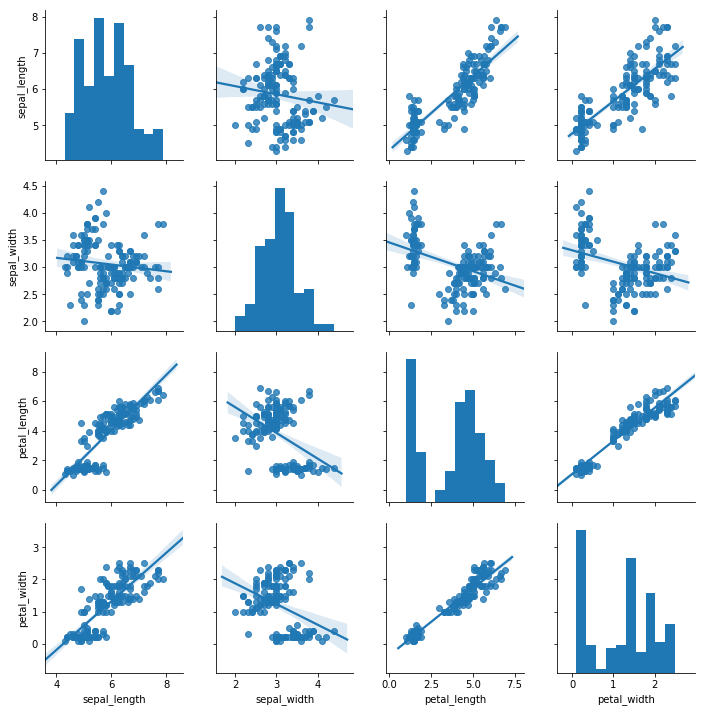

In [15]:
# 有回归方程的散点相关图 correlogram with regression
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# with regression 有回归方程的散点相关图
# 正对角线上的图表示数据频次的直方图，其他表示散点图
sns.pairplot(df, kind="reg");

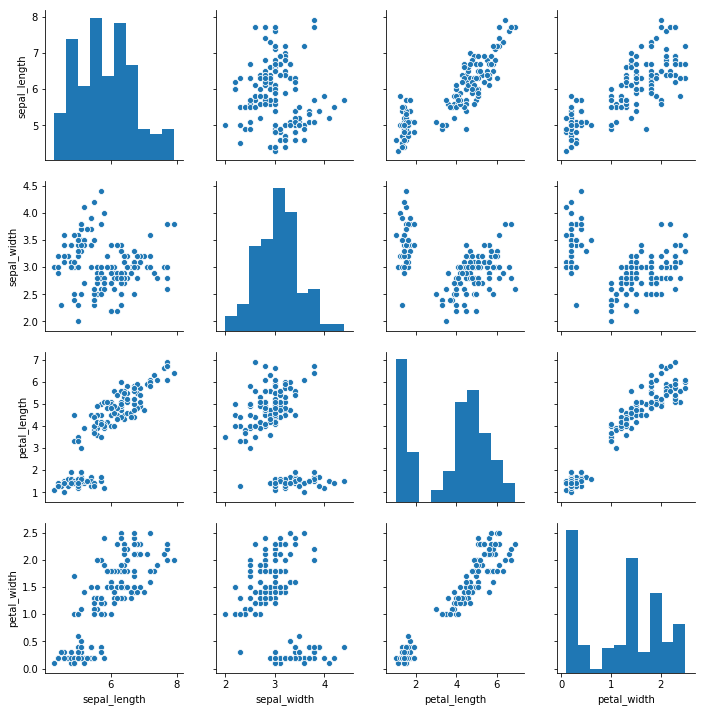

In [16]:
# 无回归方程的散点相关图 correlogram without regression 
sns.pairplot(df, kind="scatter");

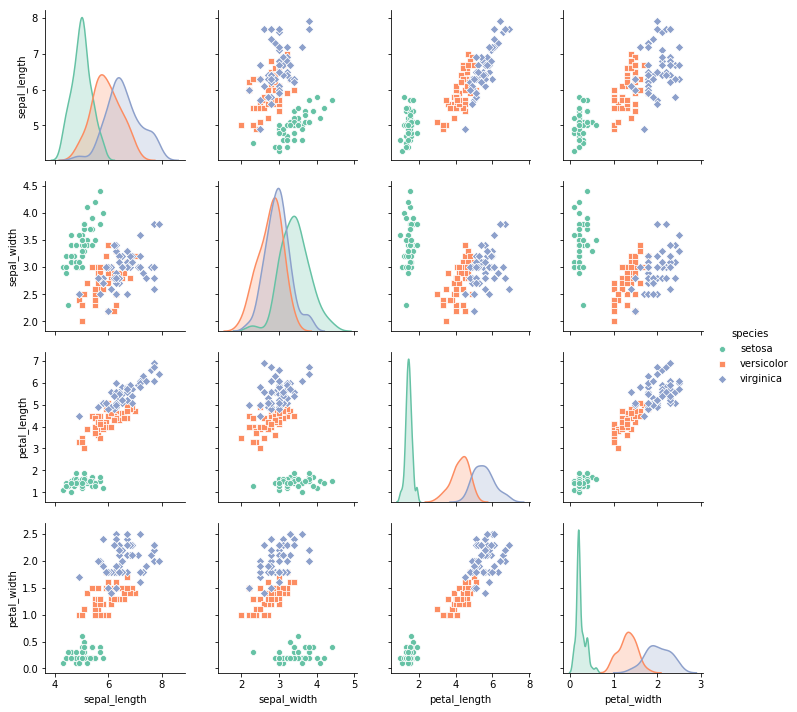

In [17]:
# 在相关图上表示组 Represent groups on correlogram
# 通过hue设定种类，markers不同种类的点的表示方式
# 对角线为核密度图
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")

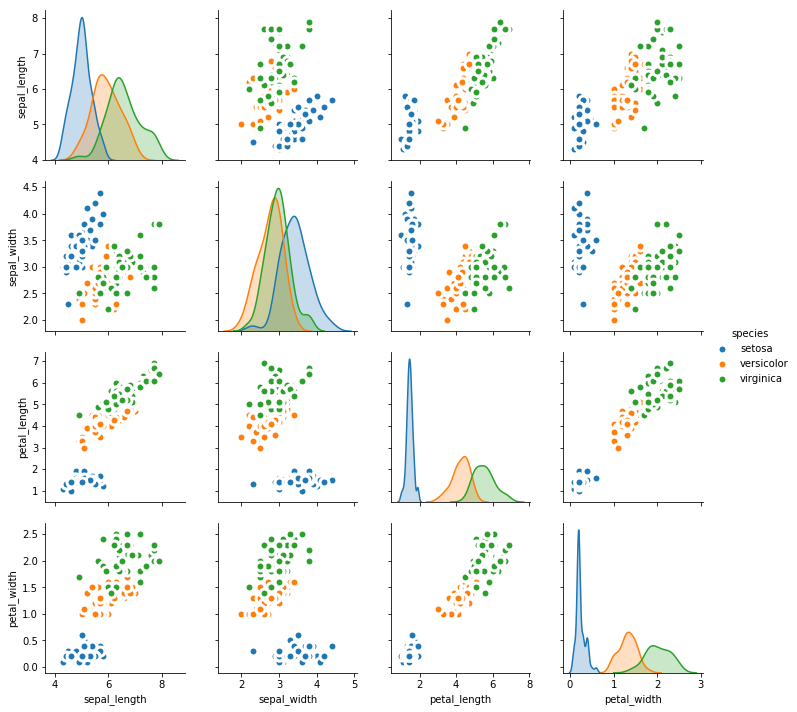

In [18]:
# 在相关图上表示组 Represent groups on correlogram
# you can give other arguments with plot_kws  plot_kws更改散点图的参数
sns.pairplot(df, kind="scatter", hue="species",plot_kws=dict(s=80, edgecolor="white", linewidth=3));

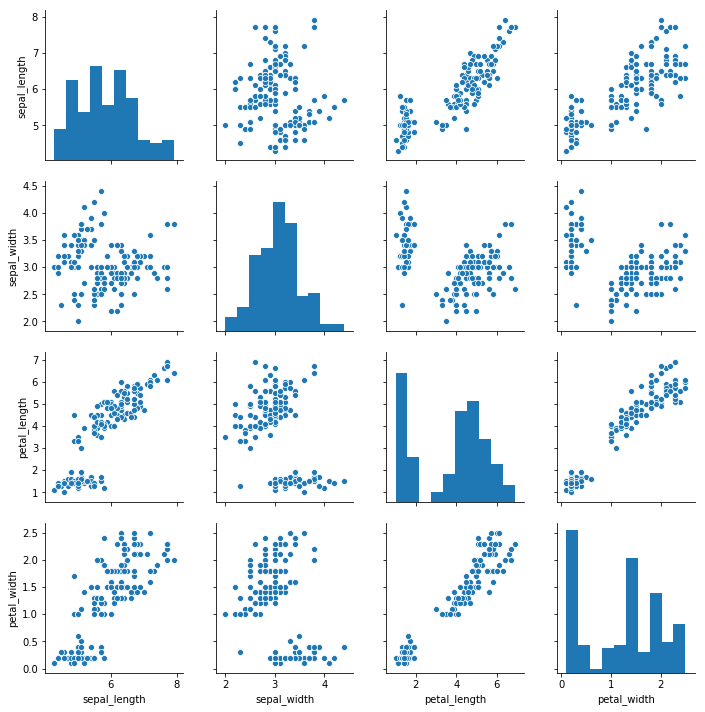

In [19]:
# 相关图子图设置 Kind of plot for the diagonal subplots
# diag_kind有auto，hist,kde选项，hist为直方图，kde为散点图
sns.pairplot(df, diag_kind="hist");

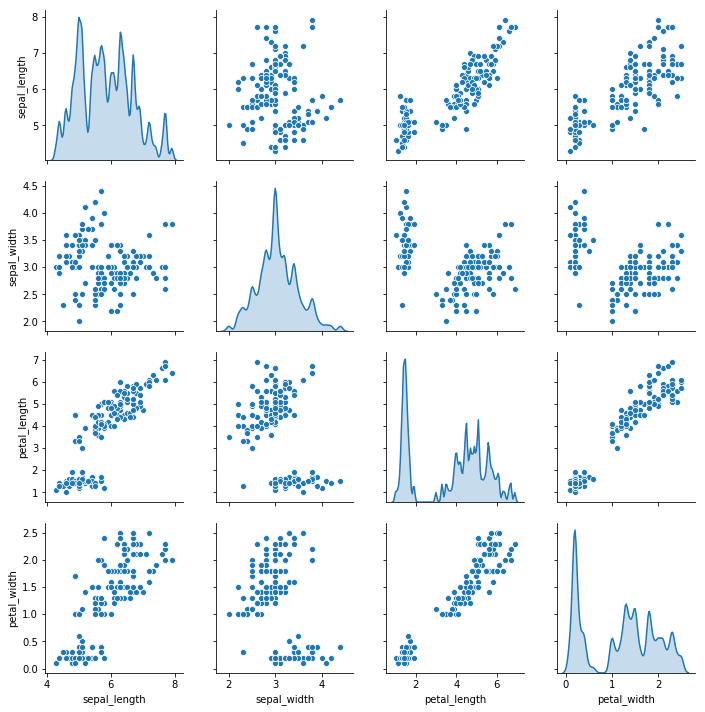

In [20]:
#  子图参数设置 parameters adjustment of subplots
# You can custom it as a density plot or histogram so see the related sections 通过diag_kws调整子图参数
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False));